# Colaboratoryで実行する場合
以下を実行して、外部ファイルをダウンロードしてください。   
**このセルはColaboratoryを起動するたびに必要となります**

In [ ]:
##################################
### Colaboratoryのみ以下を実行 ###
##################################
import sys
if 'google.colab' in sys.modules:
    !wget -P ./text http://www.hal.t.u-tokyo.ac.jp/~yamakata/lecture/mediaproc/mediaproc3/mediaproc3-1.zip
    !unzip text/mediaproc3-1.zip -d text
    !mkdir fig
    # 以下は日本語フォントをインストールするコマンドです
    !apt-get -y install fonts-ipafont-gothic
    !rm /root/.cache/matplotlib/*.json

<font color='red'>**フォントを有効にするため、Colaboratoryの場合は「ランタイム＞ランタイムを再起動」を実行してください。**</font>

# 自然言語処理１：形態素解析

今回は自然言語処理の基礎技術である形態素解析を行います。

形態素(morpheme)とは、意味を担う最小の言語要素であり、「単語」よりも少し小さく分割されたものです。   
例えば「不確実」は1単語ですが、形態素解析では「不（接頭語）＋確実（名詞）」となります。   
「不」は一単語としては存在しませんから、単語ではありません。   
また、「おいしさ」は「おいし（形容詞）＋さ（接尾語）」です。   
（ただし、Janomeが読み込んでいるIPAdicで定義された単位は、必ずしも言語学的な「形態素」ではなく、   
解析の都合や、学習コーパスの作りやすさなどを勘案して、独自の形式になっているので、言語学的に厳密な文書解析に利用する際には注意が必要です。）

コンピュータで形態素を自動的に制定する処理のことを「形態素解析」と呼び、それを行うツールのことを「形態素解析器」と呼びます。   
形態素解析は、品詞や読みを特定したり、活用形を元に戻したりするのにも使います。   
形態素解析の仕組みについては、授業でスライドを使って説明します。

なお、実際に形態素として判定されるかどうかは、その形態素が形態素解析器で使用する辞書に登録されているかどうかによって決まります。   
以下で使用する形態素解析器は機械学習ベースの手法ですので、誤りも含まれます。   
形態素解析器が分割したからといって、それが正しい形態素とは限らないのでご注意ください。



## 1. 形態素解析器

フリーで使える形態素解析器としては、MeCab, ChaSen, JUMAN, KyTeaなどがあります。   
それぞれのいい点・悪い点は授業でスライドを使って説明します。

今回はpythonに組み込みが容易なjanomeを使います。   
[janomeのWebページより](https://mocobeta.github.io/janome/)
```
Janome (蛇の目) は，Pure Python で書かれた，辞書内包の形態素解析器です。

依存ライブラリなしで簡単にインストールでき，アプリケーションに組み込みやすいシンプルな API を備える形態素解析ライブラリを目指しています。
```
以下のセルを実行してjanomeをインストールしてください。   
**Colaboratoryで実行している方は、ランタイムを起動するたびにインストールが必要です。**

In [2]:
!pip install janome

     |████████████████████████████████| 19.7 MB 7.1 MB/s eta 0:00:01


### 1.1 形態素解析

「東京大学は欧米諸国の諸制度に倣った、日本国内で初の近代的な大学として設立された。」    
という文章を形態素解析してみましょう（Wikipedia:「[東京大学＞東京大学全体](https://ja.wikipedia.org/wiki/%E6%9D%B1%E4%BA%AC%E5%A4%A7%E5%AD%A6)」より抜粋）。

tokenをそのまま出力したときのフォーマットは以下のようになっています。

```表層形, 品詞, 品詞細分類1, 品詞細分類2, 品詞細分類3, 活用型, 活用形, 原形, 読み, 発音```

In [3]:
from janome.tokenizer import Tokenizer

t = Tokenizer() # <== これは辞書を読み込み、解析プログラムを起動状態にします。メモリを食うので、１つのプログラムで１回だけ実行して、あとは使いまわしてください。

# 以下の入力文をいろいろ変えて試してみましょう。
line = '東京大学は欧米諸国の諸制度に倣った、日本国内で初の近代的な大学として設立された。'

for token in t.tokenize(line):
    print(token)


東京大学	名詞,固有名詞,組織,*,*,*,東京大学,トウキョウダイガク,トーキョーダイガク
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
欧米	名詞,固有名詞,地域,一般,*,*,欧米,オウベイ,オーベイ
諸国	名詞,一般,*,*,*,*,諸国,ショコク,ショコク
の	助詞,連体化,*,*,*,*,の,ノ,ノ
諸	接頭詞,名詞接続,*,*,*,*,諸,ショ,ショ
制度	名詞,一般,*,*,*,*,制度,セイド,セイド
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
倣っ	動詞,自立,*,*,五段・ワ行促音便,連用タ接続,倣う,ナラッ,ナラッ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
、	記号,読点,*,*,*,*,、,、,、
日本	名詞,固有名詞,地域,国,*,*,日本,ニッポン,ニッポン
国内	名詞,一般,*,*,*,*,国内,コクナイ,コクナイ
で	助詞,格助詞,一般,*,*,*,で,デ,デ
初	名詞,一般,*,*,*,*,初,ハツ,ハツ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
近代	名詞,一般,*,*,*,*,近代,キンダイ,キンダイ
的	名詞,接尾,形容動詞語幹,*,*,*,的,テキ,テキ
な	助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
大学	名詞,一般,*,*,*,*,大学,ダイガク,ダイガク
として	助詞,格助詞,連語,*,*,*,として,トシテ,トシテ
設立	名詞,サ変接続,*,*,*,*,設立,セツリツ,セツリツ
さ	動詞,自立,*,*,サ変・スル,未然レル接続,する,サ,サ
れ	動詞,接尾,*,*,一段,連用形,れる,レ,レ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
。	記号,句点,*,*,*,*,。,。,。


### 1.2 tokenの属性

tokenには次のような属性があります。

```
surface（表層形）
part_of_speech（品詞）
infl_type（活用型）
infl_form（活用形）
base_form（基本形、見出し語）
reading（読み）
phonetic（発音）
```

形態素解析の特定の属性の要素だけを表示してみましょう。


In [4]:
line = '東京大学は欧米諸国の諸制度に倣った、日本国内で初の近代的な大学として設立された。'

for token in t.tokenize(line):
    print(token.surface) # 表層形のみ書き出し


東京大学
は
欧米
諸国
の
諸
制度
に
倣っ
た
、
日本
国内
で
初
の
近代
的
な
大学
として
設立
さ
れ
た
。


### 1.3 分かち書き

テキスト分析において何はともあれ必要なのは、一連の文字列を単語に分割することです。  
単語と単語の間に何らかの記号（空白やスラッシュ「/」）を挿入して記述することを「分かち書き」といいます。   
janomeではフラグ`wakati`をTrueにすることで単語の表層形をリストとして生成することができます。

In [26]:
line = '東京大学は欧米諸国の諸制度に倣った、日本国内で初の近代的な大学として設立された。'

#print('/'.join(t.tokenize(line, wakati=True)))
lines='/'.join(t.tokenize(line, wakati=True))
print(lines)
print(type(line))
print(type(lines))

東京大学/は/欧米/諸国/の/諸/制度/に/倣っ/た/、/日本/国内/で/初/の/近代/的/な/大学/として/設立/さ/れ/た/。
<class 'str'>
<class 'str'>


### 1.4 品詞・固有表現

品詞（part_of_speech, pos）の項目には、   
```
品詞,品詞細分類1,品詞細分類2,品詞細分類3
```
の３つの要素がカンマ区切りで納められています。   
特に品詞細分類２と品詞細分類３には、IREX（※）で定められた以下の8種類の固有表現（Named Entity, NE)が納められています。

- 組織名 (ORGANIZATION)
- 人名 (PERSON)
- 地名 (LOCATION)
- 日付表現 (DATE)
- 時間表現 (TIME)
- 金額表現 (MONEY)
- 割合表現 (PERCENT) 
- 固有物名 (ARTIFACT) 

※１９９８年５月頃から１９９９年９月まで行なわれた情報検索、情報抽出のコンテスト形式のプロジェクト。Information Retrieval and Extraction Exercise

http://www.unixuser.org/~euske/doc/postag/

In [6]:
for token in t.tokenize(line):
    print(token.part_of_speech)

名詞,固有名詞,組織,*
助詞,係助詞,*,*
名詞,固有名詞,地域,一般
名詞,一般,*,*
助詞,連体化,*,*
接頭詞,名詞接続,*,*
名詞,一般,*,*
助詞,格助詞,一般,*
動詞,自立,*,*
助動詞,*,*,*
記号,読点,*,*
名詞,固有名詞,地域,国
名詞,一般,*,*
助詞,格助詞,一般,*
名詞,一般,*,*
助詞,連体化,*,*
名詞,一般,*,*
名詞,接尾,形容動詞語幹,*
助動詞,*,*,*
名詞,一般,*,*
助詞,格助詞,連語,*
名詞,サ変接続,*,*
動詞,自立,*,*
動詞,接尾,*,*
助動詞,*,*,*
記号,句点,*,*


## 2. ユーザ定義辞書の追加

Janomeをはじめ形態素解析器では、あらかじめ用意した形態素辞書から、最もそれらしい並びを選ぶことで形態素解析を行います。   
逆に言えば、辞書に登録されていない形態素を見つけ出すことはできません。   
辞書には一般的な用語は概ね登録されていると思いますが、固有名詞や新語、顔文字やくだけた表現（TwitterやFacebookのようなSNSを解析する際は特に重要）は登録されていない場合が多いです。   
形態素解析では、その形態素だけでなく、前後の並びをみて最適な形態素列を出力するため、文の中に解析不能な形態素が含まれていると、
その前後の形態素解析も正しく行えない場合が多いです。   

フリーの形態素解析器が使用する辞書は、多くの場合、新聞記事からなるコーパスを使って学習されています。   
ですので、新聞記事に出てくるような形態素や文面は高い精度で解析が可能です。   
しかし、TwitterやFacebookで多用される固有名詞や口語体、記号の組み合わせによる顔文字は解析が困難です。

そこで、このような文面を解析するには、ユーザ辞書を作成して、既存の辞書に追加してください。   
まず、ユーザ辞書を使わない場合の東京大学のある日のツイート（@UTokyo_News）を解析してみましょう。

In [7]:
line = 'ロスマリン酸摂取後の脳内ドーパミンがアルツハイマー病を予防する  ポリフェノールの新たな作用機序'

for token in t.tokenize(line):
    print(token)

ロス	名詞,固有名詞,地域,一般,*,*,ロス,ロス,ロス
マリン	名詞,固有名詞,一般,*,*,*,マリン,マリン,マリン
酸	名詞,一般,*,*,*,*,酸,サン,サン
摂取	名詞,サ変接続,*,*,*,*,摂取,セッシュ,セッシュ
後	名詞,接尾,副詞可能,*,*,*,後,ゴ,ゴ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
脳	名詞,一般,*,*,*,*,脳,ノウ,ノー
内	名詞,接尾,一般,*,*,*,内,ナイ,ナイ
ドーパミン	名詞,一般,*,*,*,*,ドーパミン,*,*
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
アルツハイマー	名詞,一般,*,*,*,*,アルツハイマー,アルツハイマー,アルツハイマー
病	名詞,接尾,一般,*,*,*,病,ビョウ,ビョー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
予防	名詞,サ変接続,*,*,*,*,予防,ヨボウ,ヨボー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
  	記号,空白,*,*,*,*,  ,*,*
ポリ	名詞,一般,*,*,*,*,ポリ,ポリ,ポリ
フェノール	名詞,一般,*,*,*,*,フェノール,フェノール,フェノール
の	助詞,連体化,*,*,*,*,の,ノ,ノ
新た	名詞,形容動詞語幹,*,*,*,*,新た,アラタ,アラタ
な	助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
作用	名詞,サ変接続,*,*,*,*,作用,サヨウ,サヨー
機	名詞,接尾,一般,*,*,*,機,キ,キ
序	名詞,サ変接続,*,*,*,*,序,ジョ,ジョ


ここでは「ロスマリン」「ポリフェノール」「機序」をこのまとまりで形態素として認識できるような辞書を作りたいと思います。

## 辞書の記述

Janomeのデフォルトユーザー定義辞書のフォーマットは，MeCab 辞書と同じです。   
MeCabについての説明を見てみましょう。  

[MeCab「単語の追加方法」](http://taku910.github.io/mecab/dic.html)より抜粋：   

----

エントリは, 以下のような CSV で追加します. 名詞などの活用しない語だと, 登録は簡単です.

`工藤,1223,1223,6058,名詞,固有名詞,人名,名,*,*,くどう,クドウ,クドウ`

左から,

`表層形,左文脈ID,右文脈ID,コスト,品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音`  

です.

左文脈IDは, その単語を左から見たときの内部状態IDです. 通常システム 辞書と同一場所にある left-id.def から該当する ID を選択します. -1にすると、 mecab-dict-index が自動的に ID を付与します.

右文脈IDは, その単語を右から見たときの内部状態IDです. 通常システム 辞書と同一場所にある right-id.def から該当する ID を選択します.-1にすると、 mecab-dict-index が自動的に ID を付与します.

コストは,その単語がどれだけ出現しやすいかを示しています. 小さいほど, 出現しやすいという意味になります. 似たような単語と 同じスコアを割り振り, その単位で切り出せない場合は, 徐々に小さくしていけばいいと思います.

さらに, 自分の好きな情報をCSVが許す範囲で追加してもかまいません.

`ユーザ設定,,,10,名詞,一般,*,*,*,*,ユーザ設定,ユーザセッテイ,ユーザセッテイ,追加エントリ`

----
Janome v0.3では[mecabのipadic](https://sourceforge.net/projects/mecab/files/mecab-ipadic/2.7.0-20070801/)を辞書データとして読み込んでいます。   
（IPAとは情報処理振興事業協会(Information-technology Promotion Agency)のことで、この辞書はIPAで設定されたIPA品詞体系(THiMCO97)に基づいて作成されたものです。）   
このファイルをダウンロードして展開すると、`right-id.def`や`left-id.def`というファイルがあり、ここに品詞が列挙されています。 

例えば固有名詞には次のような種類があります。
```
1288 名詞,固有名詞,一般,*,*,*,*
1289 名詞,固有名詞,人名,一般,*,*,*
1290 名詞,固有名詞,人名,姓,*,*,*
1291 名詞,固有名詞,人名,名,*,*,*
1292 名詞,固有名詞,組織,*,*,*,*
1293 名詞,固有名詞,地域,一般,*,*,*
1294 名詞,固有名詞,地域,国,*,*,*
```
上でも説明したように、形態素解析は、前後の形態素の並びを考慮しながら行います。   
この時、右や左の単語とのつながり安さは、右や左の単語の品詞のつながり安さで表現されます。   
このつながり安さは、ファイル`matrix.def`に記録されています。   
`right-id.def`や`left-id.def`で定義されている品詞番号と、`matrix.def`に記録されている品詞のつながり安さをもって、   
もっともそれらしい形態素の並びを探し出しているというわけです。


それでは実際にユーザ辞書を作成してみましょう。   
コストはとりあえず1000とします。また、左文脈ID、右文脈IDはmecab-dict-indexに自動的に割り振ってもらうことにして、ここでは単に'-1'としましょう。

ここではわざわざPythonでCSVファイルを生成するというやり方をとっていますが、ユーザ辞書はただのCSVファイルなので、
何を使って作成しても構いません。   
たとえばExcelやテキストエディタで直接作成しても結構です。

In [8]:
with open('userdic.csv', 'w', encoding='utf-8') as f:
    f.write('ロスマリン,-1,-1,1000,名詞,固有名詞,一般,*,*,*,ロスマリン,ロスマリン,ロスマリン\n')
    f.write('ポリフェノール,-1,-1,1000,名詞,固有名詞,一般,*,*,*,ポリフェノール,ポリフェノール,ポリフェノール\n')
    f.write('機序,-1,-1,1000,名詞,普通名詞,*,*,*,*,機序,キジョ,キジョ\n')

作成したユーザ辞書を読み込んで、形態素解析を実行してみましょう。   
正しく解析できたでしょうか？

In [9]:
from janome.tokenizer import Tokenizer
t = Tokenizer("userdic.csv", udic_enc="utf8")

line = 'ロスマリン酸摂取後の脳内ドーパミンがアルツハイマー病を予防する  ポリフェノールの新たな作用機序'

for token in t.tokenize(line):
    print(token)

ロスマリン	名詞,固有名詞,一般,*,*,*,ロスマリン,ロスマリン,ロスマリン
酸	名詞,一般,*,*,*,*,酸,サン,サン
摂取	名詞,サ変接続,*,*,*,*,摂取,セッシュ,セッシュ
後	名詞,接尾,副詞可能,*,*,*,後,ゴ,ゴ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
脳	名詞,一般,*,*,*,*,脳,ノウ,ノー
内	名詞,接尾,一般,*,*,*,内,ナイ,ナイ
ドーパミン	名詞,一般,*,*,*,*,ドーパミン,*,*
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
アルツハイマー	名詞,一般,*,*,*,*,アルツハイマー,アルツハイマー,アルツハイマー
病	名詞,接尾,一般,*,*,*,病,ビョウ,ビョー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
予防	名詞,サ変接続,*,*,*,*,予防,ヨボウ,ヨボー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
  	記号,空白,*,*,*,*,  ,*,*
ポリフェノール	名詞,固有名詞,一般,*,*,*,ポリフェノール,ポリフェノール,ポリフェノール
の	名詞,非自立,一般,*,*,*,の,ノ,ノ
新た	名詞,形容動詞語幹,*,*,*,*,新た,アラタ,アラタ
な	助動詞,*,*,*,特殊・ダ,体言接続,だ,ナ,ナ
作用	名詞,サ変接続,*,*,*,*,作用,サヨウ,サヨー
機序	名詞,普通名詞,*,*,*,*,機序,キジョ,キジョ


## 3. おまけ
### 3.1 特定の品詞の単語のヒストグラムを計算しよう

形態素解析の結果を用いて、その文書の特徴を解析してみましょう。   
まずは、特定の小説から「名詞」のみを抜き出し、そのヒストグラムを描画してみます。   
いくつかの小説は旧仮名遣いが使われていますが、このような用語はIPA辞書には登録されていないので、誤って「名詞」と判定されてしまいます。   
本来ならユーザ辞書を作ってただしく解析させるべきですが、ここでは簡単のため、条件文で取り除くことにします。

In [11]:
import csv
import collections

noun = []
#with open('text/miyazwa_chuumon_morphem.csv', 'r', encoding='utf-8') as fi: # 「注文の多い料理店」
#with open('text/miyazawa_gingatetsudo_morphem.csv', 'r', encoding='utf-8') as fi: # 「銀河鉄道の夜」
#with open('text/dazai_ningenshikkaku_morphem.csv', 'r', encoding='utf-8') as fi: # 「人間失格」
with open('text/dazai_shayou_morphem.csv', 'r', encoding='utf-8') as fi: # 「斜陽」
#with open('text/miyazawa_GauchetheCellist_morphem.csv', 'r', encoding='utf-8') as fi: # 「セロ弾きのゴーシュ」
#with open('text/dazai_RunMelos_morphem.csv', 'r', encoding='utf-8') as fi: # 「走れメロス」
#with open('text/miyazawa_kazenomatasaburou_morphem.csv', 'r', encoding='utf-8') as fi: # 「風の又三郎」
    dataReader = csv.reader(fi)
    for row in dataReader:
        # 旧仮名遣いによる誤認識を条件文によって除去（非推奨）
        if row[1] == '名詞' and row[0] != 'つて' and row[0] != 'の' and row[0] != 'やう':
#        if row[1] == '副詞':
            noun.append(row[0])

# 特定の品詞の形態素からなるリストから、その人グラムを生成
count = collections.Counter(noun)

ヒストグラムをグラフとして描画してみましょう。   

ここで、日本語フォントをグラフに書き出すために、`font.family`という変数で、フォントを指定しています。   
WindowsかMacかによって、使用できるフォントが異なります。   
それぞれのOSにあったフォントが使用されるよう、適切な行をコメントアウトしてください。   
もしそれでも文字化けする場合は、IPAex日本語フォントをインストールして設定してください。

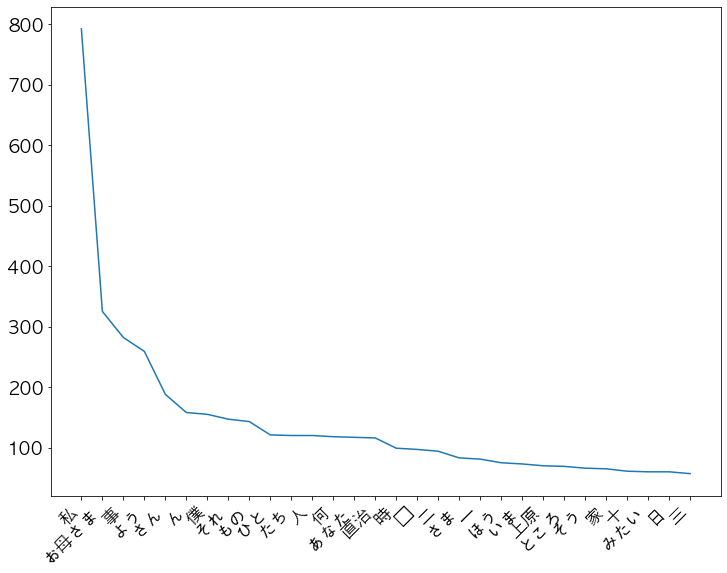

In [15]:
%matplotlib inline
from operator import itemgetter
import matplotlib.pyplot as plt

sorted_count = sorted(count.items(), key=itemgetter(1), reverse=True)
label = [x[0] for x in sorted_count]
value = [x[1] for x in sorted_count]

#フォントをインストールする場合はこちら↓
# https://ipafont.ipa.go.jp/old/ipaexfont/download.html

# IPAex日本語フォントのインストールができた人は、以下によって日本語が出力できるはずです
# できていない環境では、日本語の文字は□に置き換えられます
#plt.rcParams["font.family"] = "IPAexGothic"

# Windowsなら以下でうまく行くかもしれません
# plt.rcParams["font.family"] = "Yu Mincho"
# Macなら以下でうまく行くかもしれません
#plt.rcParams['font.family'] = 'AppleGothic'
# Colaboratoryでは以下を指定してください
plt.rcParams["font.family"] = "AppleGothic"

plt.rcParams["font.size"] = 18 # 文字のサイズ

plt.figure(figsize=(12,9))
plt.xticks(rotation=45, horizontalalignment='right')
plt.plot(label[:30], value[:30])
plt.savefig('fig/TextProcessing1-1.png') # 図を画像として保存

### 3.2 ワードクラウド

ワードクラウドはパッと見てその小説の内容を把握するためのアイコンとして用いられます。   
出現頻度が高いほど、その単語が重要と考えて、その単語のフォントサイズを大きくします。   
出現頻度の高いものから画面上にランダムに単語を配置することで画像を生成します。

In [16]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ワードクラウドの生成
wc = WordCloud(background_color="white",
    #font_path="C:\Windows\Fonts\msgothic.ttc", # Windows
    #font_path="/System/Library/Fonts//AppleSDGothicNeo.ttc", # Mac OS
    font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', # Colaboratory
    width=640,height=480).generate_from_frequencies(count)

# ワードクラウドの描画
fig = plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
fig.tight_layout() # 図がはみ出さないようにレイアウト
plt.savefig('fig/TextProcessing1-2.png') # 図を画像として保存

ModuleNotFoundError: No module named 'wordcloud'

本教材の作品データは[青空文庫](https://www.aozora.gr.jp/index.html)のものを使用しています。   
ただし、ルビや入力者注、アクセント分解された欧文や編者による注記等は削除しました。   
また、詩のように短い文章から構成されるものをのぞくなど、調整を行っています。